In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("sequentialRandomizedCPGCResults_PSC.csv")
list(df.columns)

['graphNodes',
 'density',
 'expNo',
 'delta',
 'compressionRatio',
 'executionTime',
 'readTime',
 'writeTime']

In [4]:
nodes = list(df['graphNodes'].unique())
density = list(df['density'].unique())
expNo = list(df['expNo'].unique())
# cores = list(df['cores'].unique())
delta = list(df['delta'].unique())
nodes.remove(32768)
nodes

[2048, 4096, 8192, 16384]

In [6]:
density

[80, 85, 90, 95, 98]

In [7]:
delta

[0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [8]:
color = ['gainsboro', 'silver', 'darkgrey', 'grey', 'dimgrey']

In [9]:
def remove_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    filtered_data = [x for x in data if (x >= lower_bound and x <= upper_bound)]
    return round(np.mean(filtered_data), 2)

In [12]:
avgCompRatio = {}
avgExeTime = {}
avgWriteTime = {} 
avgReadTime =  {}
avgMergeTime =  {}


for n in nodes:
    for d in density:
        for e in expNo:
            for de in delta:
                avgCompRatio[(n,d,e,de)] = remove_outliers(df[(df['graphNodes'] == n) & (df['density'] == d) & (df['expNo'] == e) & 
                                   (df['delta'] == de)].compressionRatio.tolist())
                avgExeTime[(n,d,e,de)] = remove_outliers(df[(df['graphNodes'] == n) & (df['density'] == d) & (df['expNo'] == e) & 
                                  (df['delta'] == de)].executionTime.tolist())
                avgWriteTime[(n,d,e,de)] = remove_outliers(df[(df['graphNodes'] == n) & (df['density'] == d) & (df['expNo'] == e) & 
                                   (df['delta'] == de)].writeTime.tolist())
                avgReadTime[(n,d,e,de)] = remove_outliers(df[(df['graphNodes'] == n) & (df['density'] == d) & (df['expNo'] == e) & 
                                   (df['delta'] == de)].readTime.tolist())
                

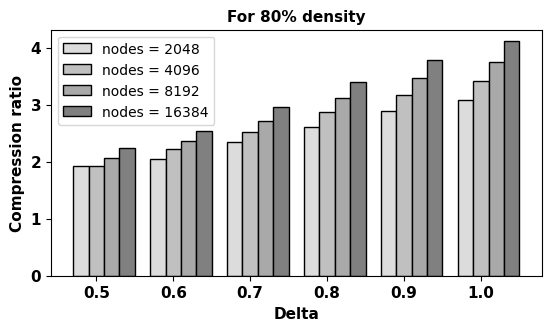

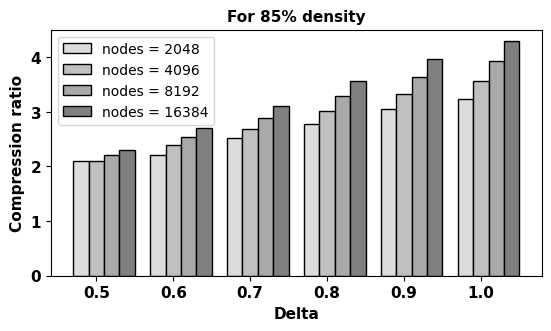

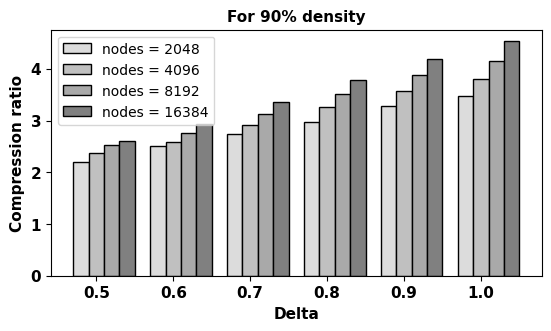

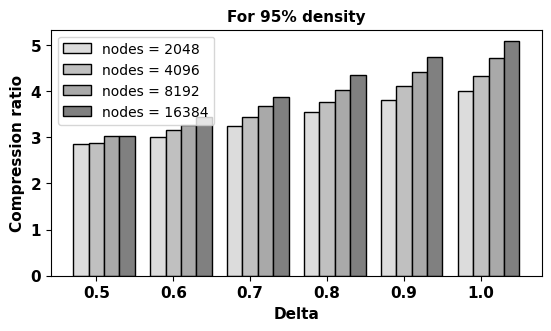

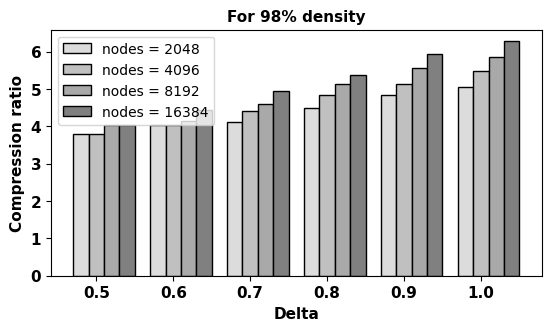

In [13]:
# we want to show that increasing delta increases the compression rate therefore we plot for fixed density and fixed cores
# x axis is delta and y axis is compression ratio for 3 different nodes


for d in density:
    e = 1
    plotData = {}
    for n in nodes:
        plotData[n] = []   
        for de in delta:
            plotData[n].append(avgCompRatio[(n,d,e,de)])

    bar_width = 0.2  # Width of each bar
    x = np.arange(len(delta))  # X-axis values
    f, axes = plt.subplots(constrained_layout=True, figsize=[5.4, 3.2])
    i = 0

    for n in nodes:
        plt.bar(x + i * bar_width, plotData[n], width=bar_width, label= f"nodes = {n}", color = color[i], edgecolor = 'k')
        i = i + 1

    fc = 11
    # Adding labels, title, and legend
    plt.xlabel('Delta', fontsize=11, weight = 'bold')
    plt.ylabel('Compression ratio', fontsize=11, weight = 'bold')
    plt.title(f'For {d}% density', fontsize=11, weight = 'bold')
    plt.xticks(x + bar_width, delta, fontsize=11, weight = 'bold')
    plt.yticks(fontsize=11, weight = 'bold')
    plt.legend()
    plt.show()

In [14]:
# # we want to show that with increasing cores decreses the execution time therefore we plot for fixed density and fixed delta
# # x axis is cores and y axis is execution time for 3 different nodes

# e = 1
# density2 = density
# # density2.remove(100)
# for de in delta:
#     for d in density2:
#         plotData = {}
#         for n in nodes:
#             plotData[n] = []   
#             for c in cores:
#                 plotData[n].append(avgExeTime[(n,d,e,c,de)])

#         bar_width = 0.2  # Width of each bar
#         x = np.arange(len(cores))  # X-axis values
#         f, axes = plt.subplots(constrained_layout=True, figsize=[14, 5])
#         i = 0
        
#         for n in nodes:
#             plt.bar(x + i * bar_width, plotData[n], width=bar_width, label= f"nodes = {n}", color = color[i], edgecolor = 'k')
#             i = i + 1

#         fc = 11
#         # Adding labels, title, and legend
#         plt.xlabel('Number of processors', fontsize=16, weight = 'bold')
#         plt.ylabel('Average Execution time(s)', fontsize=16, weight = 'bold')
#         plt.title(f'For {d}% density and {de} delta', fontsize=16, weight = 'bold')
#         plt.xticks(x + bar_width, cores, fontsize=16, weight = 'bold')
#         plt.yticks(fontsize=16, weight = 'bold')
#         plt.legend(fontsize=16)
# #         plt.ylim(0, 38)
#         plt.show()

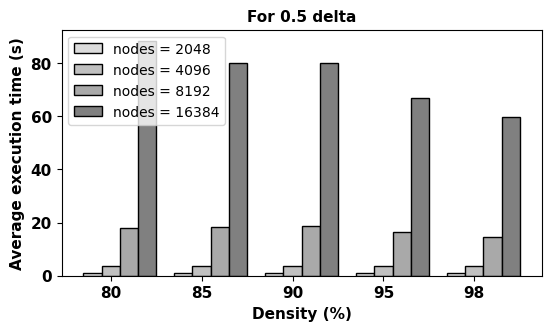

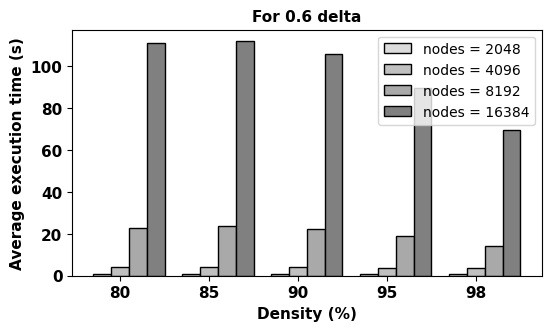

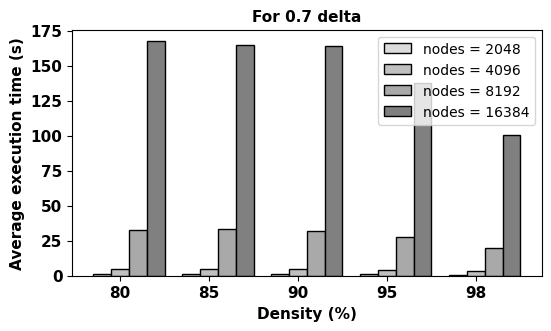

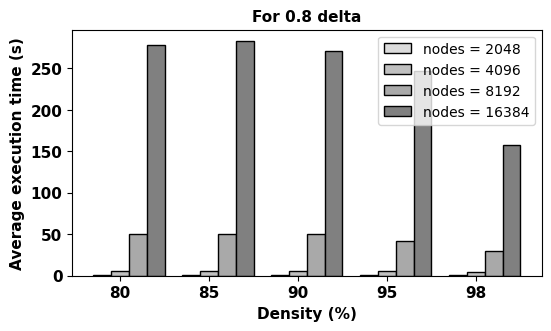

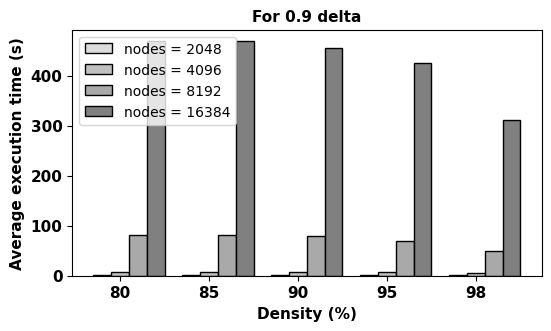

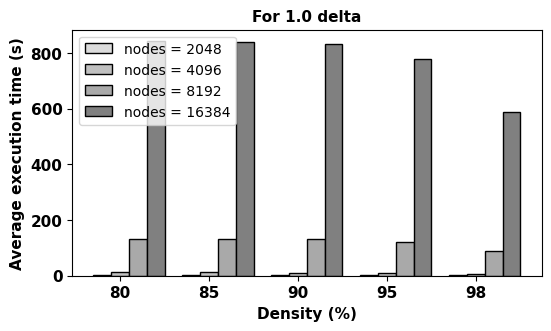

In [17]:
# we want to show that with increasing density increases the execution time therefore we plot for fixed cores and fixed delta
# x axis is density and y axis is execution time for 3 different nodes

e = 1
# density2.remove(100)
# density = sorted(density2)
for de in delta:
     
    plotData = {}
    for n in nodes:
        plotData[n] = []
        for d in density:
            plotData[n].append(avgExeTime[(n,d,e,de)])

    bar_width = 0.2  # Width of each bar
    x = np.arange(len(density))  # X-axis values
    f, axes = plt.subplots(constrained_layout=True, figsize=[5.4, 3.2])
    i = 0
    for n in nodes:
        plt.bar(x + i * bar_width, plotData[n], width=bar_width, label= f"nodes = {n}", color = color[i], edgecolor = 'k')
        i = i + 1

    fc = 11
    # Adding labels, title, and legend
    plt.xlabel('Density (%)', fontsize=11, weight = 'bold')
    plt.ylabel('Average execution time (s)', fontsize=11, weight = 'bold')
    plt.title(f'For {de} delta', fontsize=11, weight = 'bold')
    plt.xticks(x + bar_width, density, fontsize=11, weight = 'bold')
    plt.yticks(fontsize=11, weight = 'bold')
    plt.legend()
    plt.show()

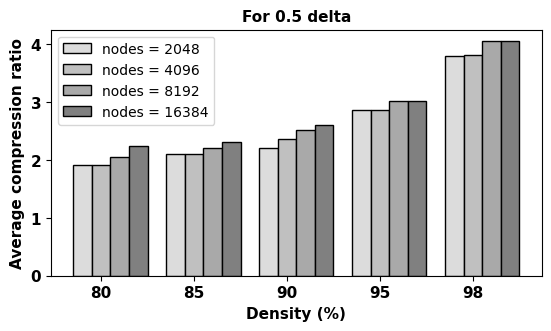

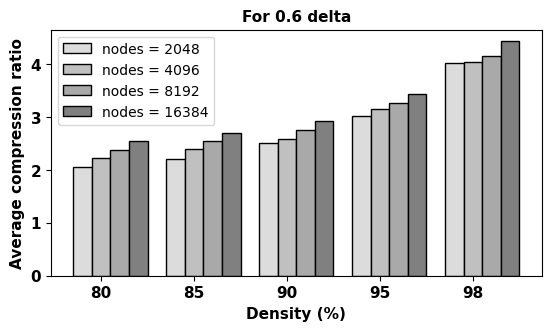

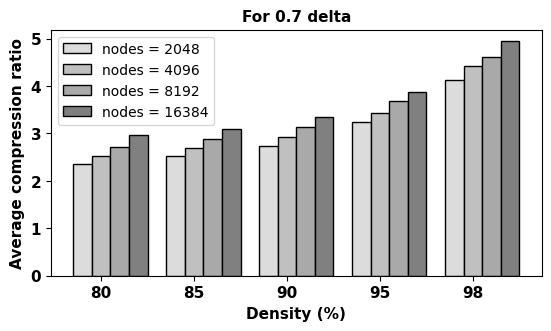

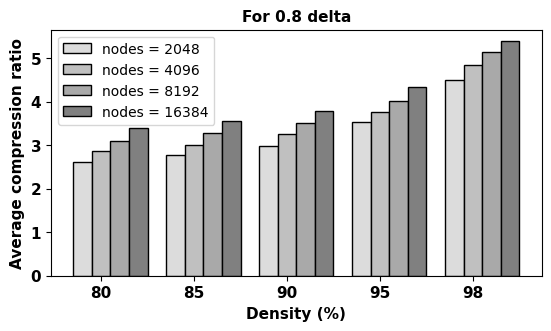

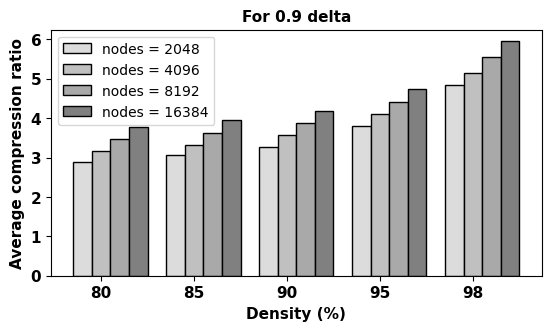

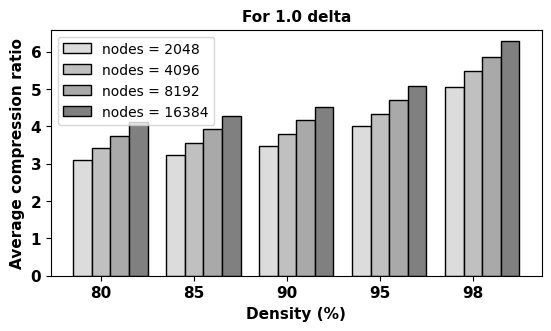

In [19]:
# we want to show that with increasing density increases the compression ratio therefore we plot for fixed cores and fixed delta
# x axis is density and y axis is execution time for 3 different nodes

e = 1
# density2.remove(100)
# density = sorted(density2)

for de in delta:
    plotData = {}
    for n in nodes:
        plotData[n] = []
        for d in density:
            plotData[n].append(avgCompRatio[(n,d,e,de)])

    bar_width = 0.2  # Width of each bar
    x = np.arange(len(density))  # X-axis values
    f, axes = plt.subplots(constrained_layout=True, figsize=[5.4, 3.2])
    i = 0
    
    for n in nodes:
        plt.bar(x + i * bar_width, plotData[n], width=bar_width, label= f"nodes = {n}", color = color[i], edgecolor = 'k')
        i = i + 1

    fc = 11
    # Adding labels, title, and legend
    plt.xlabel('Density (%)', fontsize=11, weight = 'bold')
    plt.ylabel('Average compression ratio', fontsize=11, weight = 'bold')
    plt.title(f'For {de} delta', fontsize=11, weight = 'bold')
    plt.xticks(x + bar_width, density, fontsize=11, weight = 'bold')
    plt.yticks(fontsize=11, weight = 'bold')
    plt.legend()
    plt.show()